# **Zipf’s Law Analysis on Selena Gomez Song Lyrics**



1. Parth Tandalwade - parth.k@adypu.edu.in
2. Ansh Sharma - ansh.sharma@adypu.edu.in
3. Yatin Bhisht - yatin.bisht@adypu.edu.in
4. Ved Vadnere  -  ved.vadnere@adypu.edu.in

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter
from google.colab import files
uploaded = files.upload()


Saving SelenaGomez.csv to SelenaGomez.csv


In [3]:
# Here we are Loading the CSV file by choosing
df = pd.read_csv("SelenaGomez.csv")
print(df.columns)  #checking the names of the columns in the file

# Combine all lyrics into one string
all_lyrics = ' '.join(df['Lyric'].dropna().astype(str).tolist())  # Combining and saving the lyrics in the string named all_lyrics


Index(['Unnamed: 0', 'Artist', 'Title', 'Album', 'Year', 'Date', 'Lyric'], dtype='object')


In [4]:
# lowercasing all the characters and removing the special words
clean_lyrics = all_lyrics.lower()
clean_lyrics = re.sub(r'[^\w\s]', '', clean_lyrics)

# Tokenize (split) into words
words = clean_lyrics.split()
print(f"Total Words: {len(words)}")


Total Words: 47748


In [5]:
# Count word frequencies using Counter Library it finds the frequency of the word
word_counts = Counter(words)

# Get words and their counts sorted by frequency
most_common = word_counts.most_common()
print(f"Unique Words: {len(most_common)}")




Unique Words: 2351


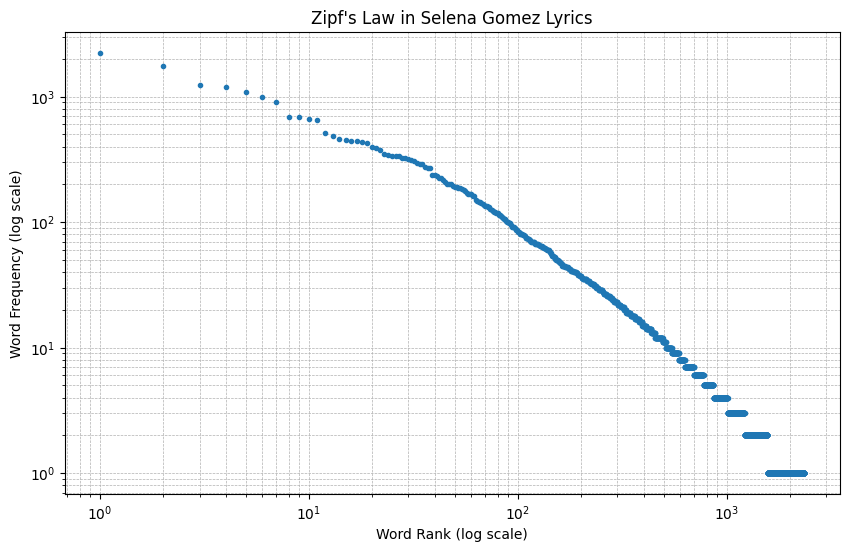

In [6]:
# Step 1: Prepare the ranks and corresponding word frequencies
# -------------------------------------------------------------
# 'most_common' is expected to be a list of (word, frequency) tuples sorted by frequency.
# We're creating a list of ranks starting from 1, since the highest frequency word gets rank 1.
ranks = np.arange(1, len(most_common) + 1)
frequencies = [freq for word, freq in most_common]


# Step 2: Plotting Zipf's Law - Rank vs Frequency on log-log scale
# ----------------------------------------------------------------
# The core idea of Zipf's Law is that word frequency is inversely proportional to its rank.
# When plotted on a log-log scale, this typically results in a straight line with negative slope.
plt.figure(figsize=(10, 6))

# Plot the data points with no line between them (just dots)
plt.loglog(ranks, frequencies, marker='.', linestyle='none')

# Title and axis labels for clarity
plt.title("Zipf's Law in Selena Gomez Lyrics")
plt.xlabel("Word Rank (log scale)")
plt.ylabel("Word Frequency (log scale)")

# Add a grid for both major and minor ticks to improve readability
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()


In [11]:
# Step: Convert most_common list into a structured DataFrame
# -----------------------------------------------------------
# 'most_common' is a list of tuples: [(word1, freq1), (word2, freq2), ...]
# We convert it into a DataFrame for easier analysis and visualization.

words_df = pd.DataFrame(most_common, columns=['Word', 'Frequency'])

# Add a 'Rank' column to the DataFrame
# -------------------------------------
# Since 'most_common' is already sorted by frequency (descending),
# we assign ranks starting from 1 (highest frequency word gets rank 1).
words_df['Rank'] = range(1, len(words_df)+1)

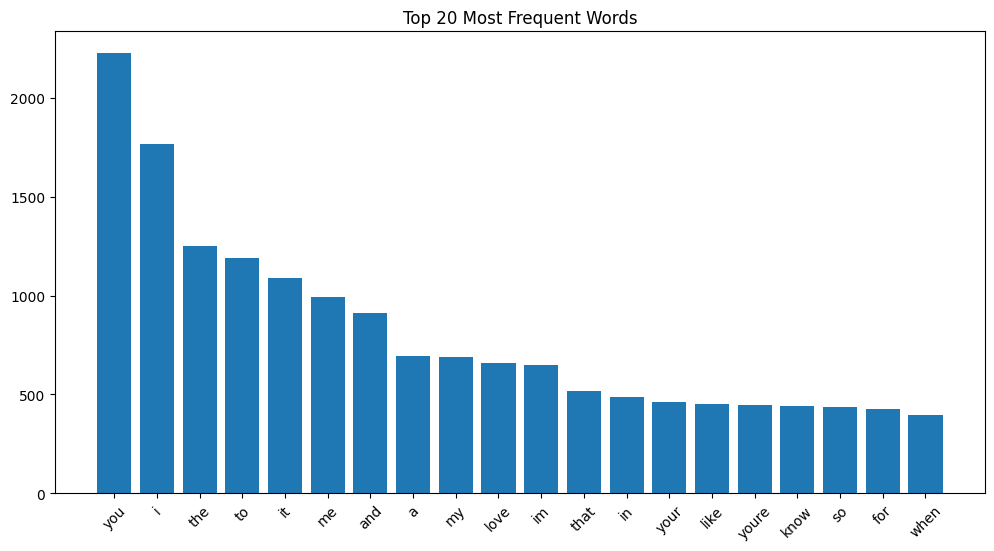

In [12]:
# Step: Visualize the Top 20 Most Frequent Words in the Lyrics
# ------------------------------------------------------------
plt.figure(figsize=(12,6))  # Set figure size to make the plot wide enough for readability

# Plot a bar chart for the top 20 words by frequency
# We use .head(20) to focus on the top 20 most common words for better visualization
plt.bar(words_df['Word'].head(20), words_df['Frequency'].head(20))

# Add a title to provide context
plt.title('Top 20 Most Frequent Words')

# Rotate x-axis labels to prevent overlap and improve readability
plt.xticks(rotation=45)

#Display the Bar Chart
plt.show()

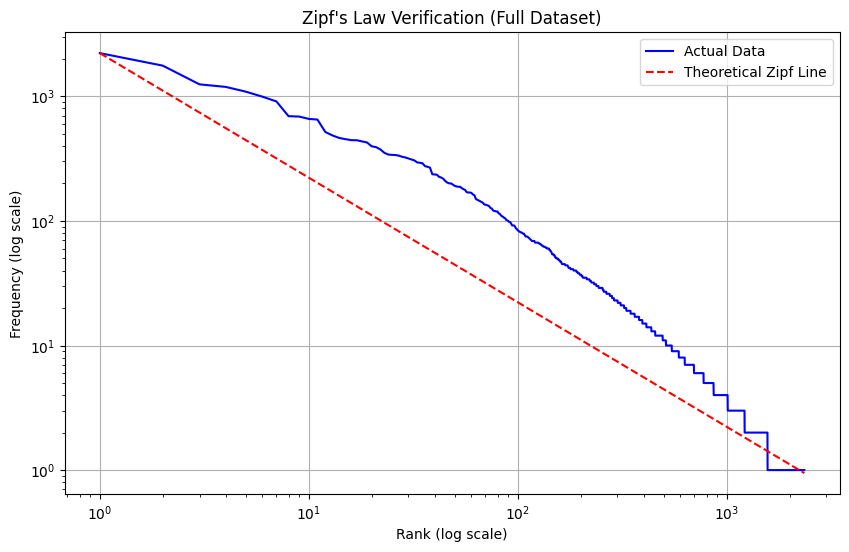

In [13]:
# Step: Verify Zipf's Law by Comparing Actual vs. Theoretical Frequencies
# ------------------------------------------------------------------------
plt.figure(figsize=(10, 6))  # Set the plot size

# Plot actual data: frequency vs. rank on a log-log scale
# 'b-' means blue solid line
plt.loglog(words_df['Rank'], words_df['Frequency'], 'b-', label='Actual Data')

# Plot theoretical Zipf's Law line for comparison
# According to Zipf's Law: frequency ∝ 1/rank
# We use the frequency of the top word as the numerator
plt.plot(words_df['Rank'], words_df['Frequency'][0] / words_df['Rank'],
         'r--', label='Theoretical Zipf Line')  # 'r--' means red dashed line

# Add title and axis labels
plt.title("Zipf's Law Verification (Full Dataset)")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")

# Add a legend to distinguish the curves
plt.legend()

# Add grid for better readability on both major and minor ticks
plt.grid(True)

# Display the final comparison plot
plt.show()


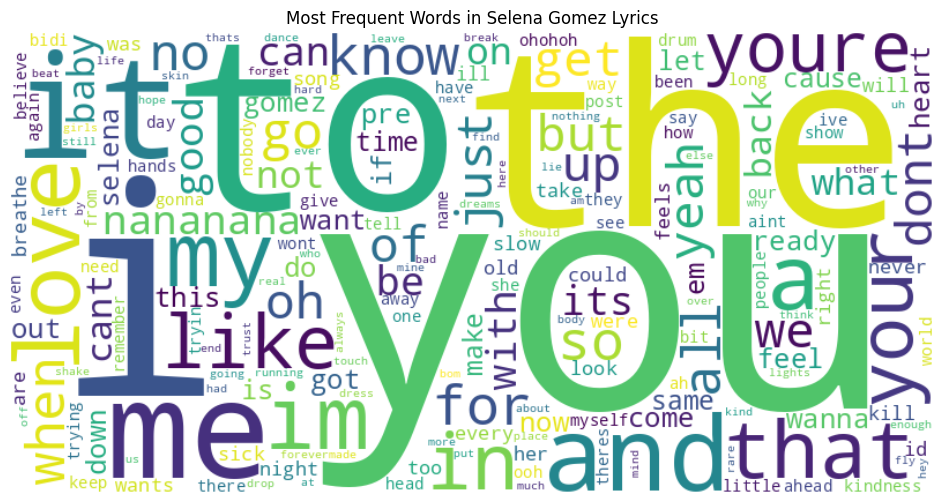

In [14]:
# Step: Create and Visualize a Word Cloud from Word Frequencies
# -------------------------------------------------------------
from wordcloud import WordCloud

# Generate the word cloud from word frequency data
# 'word_counts' should be a dictionary: {'word1': freq1, 'word2': freq2, ...}
# You can use Counter or convert the DataFrame to a dictionary if needed
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Set up the plot
plt.figure(figsize=(12, 6))  # Set figure size for clarity and aesthetics

# Display the word cloud
# 'bilinear' interpolation makes edges smoother
plt.imshow(wc, interpolation='bilinear')

# Turn off the axis for a cleaner look
plt.axis('off')

# Add a title for context
plt.title("Most Frequent Words in Selena Gomez Lyrics")

# Show the final word cloud
plt.show()




1. **Parth Tandalwade** → Data Cleaning , Data Handling, Data Visulisation , Understanding and Implementing Zipf's Law

2. **Ansh Sharma**           →  Making of PPT , Data Visulisation , Understanding and Implementing Zipf's Law

3. **Ved Vadnere**             → Data Research , Understanding Zipf's Law

4. **Yatin**                             → Data Analysis , Understanding  Zipf's Law , Reviewer

